# Cases per 100k vs Mask Usage

This investigation uses the <A HREF="https://github.com/nytimes/covid-19-data/tree/master/mask-use">NY Times Mask Use</A> data.

I was curious if counties where mask use was high had fewer cases of covid. Instead, I found quite the opposite. As the percentage of people who responded that they always wear a mask increases so do number of cases. However, I'm guessing that it is a high number of cases in a county that is driving the mask usage up

This survey questioned 250,000 people between July 2 and July 14 in 2020. I thus looked at covid case counts on 2020-07-14.

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

<A HREF="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf">Pandas cheat sheet</A>

I commented out a bunch of data loading/wrangling as I saved my data set as MaskUsageAnalysisData.csv and load it below.

In [2]:
# usage = pd.read_csv('./RawData/mask-use-by-county.csv')
# pop = pd.read_csv('./RawData/County_Pop.csv')
# covid2020 = pd.read_csv('./RawData/us-counties-2020_raw.csv', na_filter=True)
# covid2020['fips'] = covid2020['fips'].astype(pd.Int32Dtype())
# covid2020['fips'] = covid2020['fips'].apply('{:0>5}'.format)
# covid2020.rename(columns={'fips':'GEOID'}, inplace=True)
# covid2020['date'] = pd.to_datetime(covid2020['date'], format='%Y-%m-%d')
# covid2020.head()

,date,county,state,GEOID,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0.0
1,2020-01-22,Snohomish,Washington,53061,1,0.0
2,2020-01-23,Snohomish,Washington,53061,1,0.0
3,2020-01-24,Cook,Illinois,17031,1,0.0
4,2020-01-24,Snohomish,Washington,53061,1,0.0


In [3]:
# covid14Jul = covid2020.query("date=='2020-07-14'")
# covid14Jul = covid14Jul.query("county!='Unknown'")
# #covid14Jul = covid14Jul.query("fips!='00nan'")
# #covid14Jul = covid14Jul.sort_values('fips', ascending=True)

# print(covid14Jul.shape)
# covid14Jul.head()

(3169, 6)


,date,county,state,GEOID,cases,deaths
331445,2020-07-14,Autauga,Alabama,01001,746,18.0
331446,2020-07-14,Baldwin,Alabama,01003,1414,12.0
331447,2020-07-14,Barbour,Alabama,01005,428,3.0
331448,2020-07-14,Bibb,Alabama,01007,236,2.0
331449,2020-07-14,Blount,Alabama,01009,366,1.0


In [4]:
# pop = pop[['GEOID', 'NAME', 'County Pop_POPESTIMATE2020']]
# pop['GEOID'] = pop['GEOID'].astype(pd.Int32Dtype())
# pop['GEOID'] = pop['GEOID'].apply('{:0>5}'.format)
# pop.head()

,GEOID,NAME,County Pop_POPESTIMATE2020
0,31039,Cuming,8798.0
1,53069,Wahkiakum,4498.0
2,35011,De Baca,1673.0
3,31109,Lancaster,320650.0
4,31129,Nuckolls,4134.0


In [5]:
# usage = usage.rename(columns = {'COUNTYFP':'GEOID'})
# usage['GEOID'] = usage['GEOID'].astype(pd.Int32Dtype())
# usage['GEOID'] = usage['GEOID'].apply('{:0>5}'.format)
# usage.head()

,GEOID,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,01001,0.053,0.074,0.134,0.295,0.444
1,01003,0.083,0.059,0.098,0.323,0.436
2,01005,0.067,0.121,0.120,0.201,0.491
3,01007,0.020,0.034,0.096,0.278,0.572
4,01009,0.053,0.114,0.180,0.194,0.459


In [6]:
# df = pd.merge(covid14Jul, pop, how='inner', on='GEOID')
# df = pd.merge(df, usage, how='inner', on='GEOID')

In [7]:
# df['USUALLY'] = df['ALWAYS']+df['FREQUENTLY']
# df['SELDOM'] = df['NEVER']+df['RARELY']

In [9]:
# df['cases_per_100k'] = 100000*df['cases']/df['County Pop_POPESTIMATE2020']

,date,county,state,GEOID,cases,deaths,NAME,County Pop_POPESTIMATE2020,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,USUALLY,SELDOM,cases_per_100k
0,2020-07-14,Autauga,Alabama,01001,746,18.0,Autauga,56145.0,0.053,0.074,0.134,0.295,0.444,0.739,0.127,1328.702467
1,2020-07-14,Baldwin,Alabama,01003,1414,12.0,Baldwin,229287.0,0.083,0.059,0.098,0.323,0.436,0.759,0.142,616.694361
2,2020-07-14,Barbour,Alabama,01005,428,3.0,Barbour,24589.0,0.067,0.121,0.120,0.201,0.491,0.692,0.188,1740.615722


In [10]:
# df.to_csv('./RawData/MaskUsageAnalysisData.csv')

In [2]:
df = pd.read_csv('./PreprocessedData/MaskUsageAnalysisData.csv')

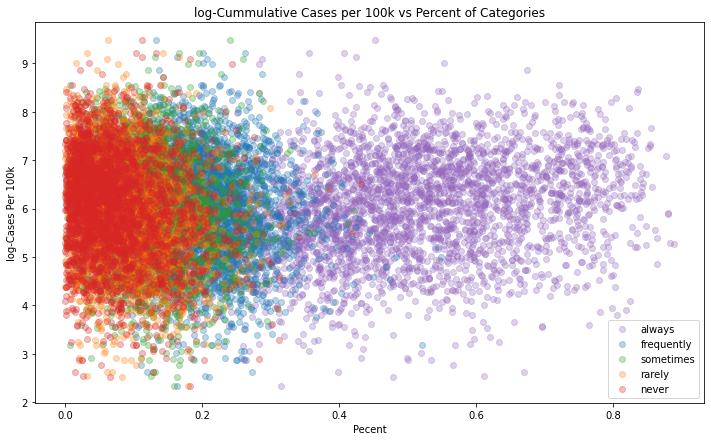

In [30]:
plt.rcParams["figure.figsize"] = (12,7)

plt.scatter(df['ALWAYS'],np.log(df['cases_per_100k']), color='tab:purple', alpha=0.3, label='always')
plt.scatter(df['FREQUENTLY'],np.log(df['cases_per_100k']), color='tab:blue', alpha=0.3, label='frequently')
plt.scatter(df['SOMETIMES'],np.log(df['cases_per_100k']), color='tab:green', alpha=0.3, label='sometimes')
plt.scatter(df['RARELY'],np.log(df['cases_per_100k']), color='tab:orange', alpha=0.3, label='rarely')
plt.scatter(df['NEVER'],np.log(df['cases_per_100k']), color='tab:red', alpha=0.3, label='never')

plt.xlabel("Pecent")
plt.ylabel("log-Cases Per 100k")
plt.title("log-Cummulative Cases per 100k vs Percent of Categories")
plt.legend()
plt.show()

In [8]:
# Simple OLS to look for linear association between cases and USUALLY wears a mask
# Yes, there is sufficient evidence to claim that such an association exists in the population at the a=0.05 level
results = smf.ols('cases_per_100k ~ USUALLY', data=df).fit()
print(results.summary())

# Note: positive coefficient for USUALLY.

                            OLS Regression Results                            
Dep. Variable:         cases_per_100k   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     41.38
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           1.45e-10
Time:                        10:24:24   Log-Likelihood:                -25159.
No. Observations:                3081   AIC:                         5.032e+04
Df Residuals:                    3079   BIC:                         5.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    148.7550     85.859      1.733      0.0

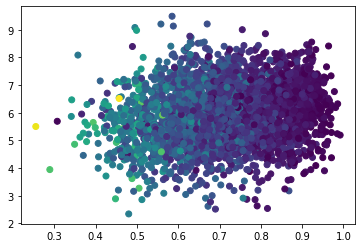

In [5]:
# Plot of log(cases per 100k) versus percent of people who usually (always+frequently) wear a mask
# Cases increase with percent of people who usually wear a mask
fig, ax = plt.subplots()
ax.scatter(df['USUALLY'], np.log(df['cases_per_100k']), c=df['NEVER'])
#ax.legend()

plt.show()

<AxesSubplot:xlabel='USUALLY', ylabel='cases_per_100k'>

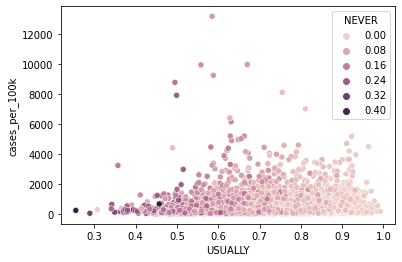

In [6]:
# Plot of cases per 100k versus percent of people who usually (always+frequently) wear a mask
sns.scatterplot(data=df, x="USUALLY", y="cases_per_100k", hue='NEVER')

In [13]:
# Simple OLS to look for linear association between cases and SELDOM wears a mask
# Yes, there is sufficient evidence to claim that such an association exists in the population at the a=0.05 level
results = smf.ols('cases_per_100k ~ SELDOM', data=df).fit()
print(results.summary())

# Note: As the percent of repsondants who seldom wear a mask increases, cases decrease.

                            OLS Regression Results                            
Dep. Variable:         cases_per_100k   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     50.34
Date:                Thu, 02 Jun 2022   Prob (F-statistic):           1.60e-12
Time:                        10:29:16   Log-Likelihood:                -25154.
No. Observations:                3081   AIC:                         5.031e+04
Df Residuals:                    3079   BIC:                         5.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    876.1560     30.122     29.087      0.0

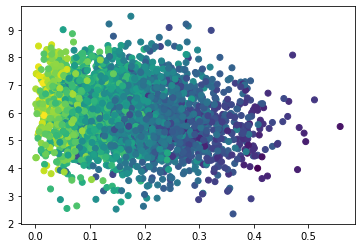

In [10]:
# Plot of log(cases per 100k) versus percent of people who seldom (never+rarely) wear a mask
plt.scatter(df['SELDOM'], np.log(df['cases_per_100k']), c=df['ALWAYS'])
plt.show()